In [ ]:
#This is our first attmempt at creating a Natural Language Processor

In [8]:
# Step 1: Import Libraries
#Basics
import pandas as pd
import numpy as np

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#NLP TOOLS
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords=stopwords.words('english')


#Strings and regular expressions
import string,re

#Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

#Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#Evaluation
from sklearn import metrics




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/estherfarkas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/estherfarkas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/estherfarkas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
#Load the data frame with the csv file to be used
df=pd.read_csv('series_data.csv')
df.head(5)

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966


In [ ]:
#ISBE- Inspect, Select, Build, Evaluate

In [12]:
#Inspect the dataframe- check for null values, duplicates and the breakdowns
df.isnull().sum()


Poster_Link               0
Series_Title              0
Runtime_of_Series         0
Certificate            1297
Runtime_of_Episodes      43
Genre                     0
IMDB_Rating               0
Overview                  0
Star1                     0
Star2                     0
Star3                     1
Star4                     5
No_of_Votes               0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [26]:
#find the type of data in the mostly null category
df.dtypes
#Fill null values with something else

#Check the values counts
df.Genre.value_counts()

Comedy                          189
Crime, Drama, Mystery           131
Animation, Action, Adventure    125
Comedy, Drama                    85
Action, Crime, Drama             66
                               ... 
Animation, Adventure, Sci-Fi      1
Comedy, Crime, Fantasy            1
Comedy, History, War              1
Documentary, Comedy, Crime        1
Family, Fantasy, Horror           1
Name: Genre, Length: 267, dtype: int64

In [64]:
#Changing the value of genre so it only has 1 values
def select_first(a_string):
    words=word_tokenize(a_string)
    return words[0]

df['First_Genre']= df['Genre'].apply(select_first)
print("Original Genre: ", df['Genre'][10])
print("First Genre Only: ", df['First_Genre'][10])

Original Genre:  Adventure, Drama, Fantasy
First Genre Only:  Adventure


In [65]:
df.First_Genre.value_counts()

Comedy         636
Drama          327
Animation      322
Action         284
Crime          248
Adventure       71
Documentary     34
Biography       21
Game-Show       16
Reality-TV      13
Family           7
Fantasy          4
Thriller         3
Short            3
Mystery          2
Horror           2
Western          2
Talk-Show        2
Sci-Fi           1
Music            1
Musical          1
Name: First_Genre, dtype: int64

In [66]:
#Select and Engineer features
#Make a pipeline to change the genres
#make lowercase
def make_lowercase(a_string):
    return a_string.lower()

lower_test_string='This IS MY Test String'
lower_test_string=make_lowercase(test_string)
print('Make Lowercase: ' + lower_test_string)

#remove punctuation
def remove_punct(a_string):
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

punct_test_string='Hello!! This is exciting?? No. It, really isnt.'
punct_test_string=remove_punct(punct_test_string)
print('Punctuation Removed: ' +punct_test_string)

#remove stopwords
def remove_stopwords(a_string):
    words=word_tokenize(a_string)
    
    valid_words=[]
    
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
            
    a_string=' '.join(valid_words)
    return a_string

stopwords_test_string='Hey so this is, well its my stopwords test its really neat i guess to me'
stopwords_test_string=remove_stopwords(stopwords_test_string)
print('Remove Stopwords: ' + stopwords_test_string)
    
#Break the words
def stem_the_words(a_string):
    
    porter=PorterStemmer()
    
    words=word_tokenize(a_string)
    
    valid_words=[]
    
    for word in words:
        stemmed_word=porter.stem(word)
        valid_words.append(stemmed_word)
        
    a_string=' '.join(valid_words)
    return a_string

stemwords_test_string='You walked and I walk along the walkway. Walking is fun since we walk together'
stemwords_test_string=stem_the_words(stemwords_test_string)
print('Stemmed: '+ stemwords_test_string)

#Why is it dropping "e"?

Make Lowercase: this is my test string
Punctuation Removed: Hello This is exciting No It really isnt
Remove Stopwords: Hey , well stopwords test really neat guess
Stemmed: you walk and I walk along the walkway . walk is fun sinc we walk togeth


In [67]:
#this is the pipeline so we dont have to type everything a million times
def clean_string_pipeline(a_string):
    a_string=make_lowercase(a_string)
    a_string=remove_punct(a_string)
    a_string=remove_stopwords(a_string)
    a_string=stem_the_words(a_string)
    
    return a_string

#sanity check
pipeline_test_string="Hello there! Its a lovely day for a walk, wouldn't you agree Mrs. Smith? I love to garden in my garden. Gardening is so rewarding and you'll agree once you have gardened as well."
pipeline_test_string=clean_string_pipeline(pipeline_test_string)
print('Clean Sentance: '+ pipeline_test_string)
    

Clean Sentance: hello love day walk wouldnt agre mr smith love garden garden garden reward youll agre garden well


In [75]:
#apply pipeline to datafram
df['Clean_Overview']=df['Overview'].apply(clean_string_pipeline)

#sanity check
print("Original Text: "+ df['Overview'][20])
print("Cleaned Test: "+ df['Clean_Overview'][20])


Original Text: An animated series that follows the exploits of a super scientist and his not-so-bright grandson.
Cleaned Test: anim seri follow exploit super scientist notsobright grandson


In [76]:
#Select and Engineer Features
#select X and y

X= df['Clean_Overview'].values
y=df['First_Genre'].values


In [77]:
# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X)

# This transforms your documents into vectors.
X = vectorizer.transform(X)

print(X.shape, type(X))

(2000, 6723) <class 'scipy.sparse.csr.csr_matrix'>


In [78]:
#sanity check
X[0]

<1x6723 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [79]:
#Build- now we do train test split on our data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=.20, random_state=20)

#Initialize the model
model=MultinomialNB(alpha=.5)

#fit
model.fit(X_train,y_train)

#test
y_pred=model.predict(X_test)

y_pred_proba= model.predict_proba(X_test)

#check accuracy
accuracy=model.score(X_test, y_test)
print('Model Accuracy: %f' % accuracy)



Model Accuracy: 0.472500


In [80]:
#Check other scores
print(classification_report(y_test, y_pred, target_names=model.classes_))

ValueError: Number of classes, 15, does not match size of target_names, 21. Try specifying the labels parameter

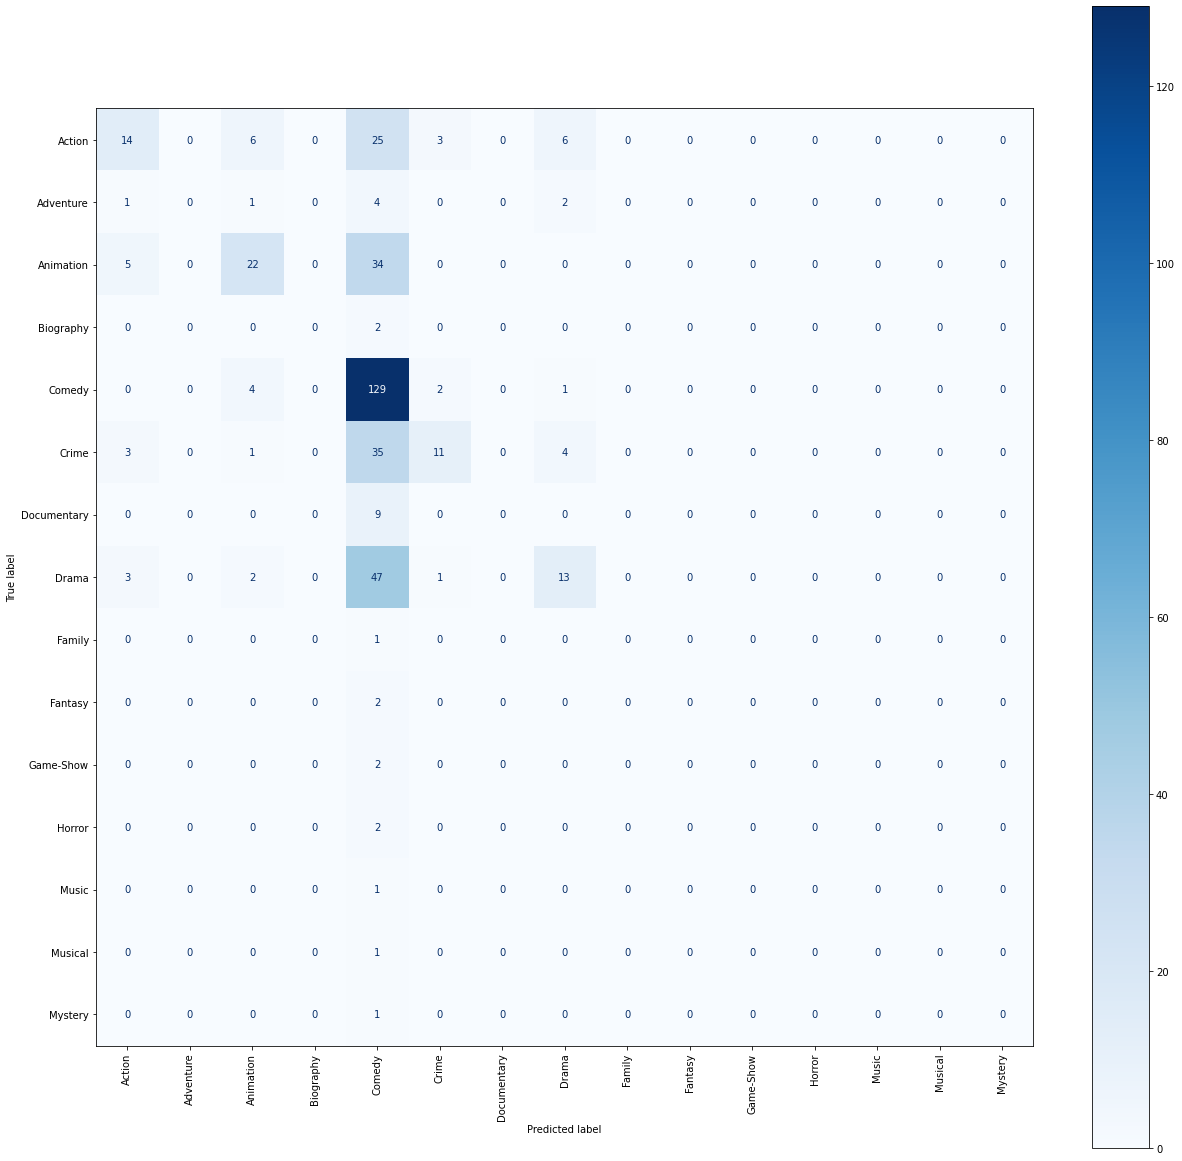

In [81]:
#plot a confusion matrix
fig, ax= plt.subplots(figsize=(21,21))
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp